# Lab 2.1 Learning How to Clean and Preprocess Data

## 1. Import pandas

In [1]:
import pandas as pd

## 2. Load the Lab 2.1 Data.xlsx file

In [2]:
df = pd.read_excel('Lab 2.1 Data.xlsx')
df.head()

,Column1,Series-Id,Year,The Value,period,METRIC,URL
0,1,1999,SUUR0000SAE1,"""100.0""",M12,Chained CPI - Education,https://data.bls.gov/cgi-bin/surveymost?su
1,2,2000,SUUR0000SAE1,"""100.6""",M01,Chained CPI - Education,https://data.bls.gov/cgi-bin/surveymost?su
2,3,2000,SUUR0000SAE1,"""100.9""",M02,Chained CPI - Education,https://data.bls.gov/cgi-bin/surveymost?su
3,4,2000,SUUR0000SAE1,"""101.0""",M03,Chained CPI - Education,https://data.bls.gov/cgi-bin/surveymost?su
4,5,2000,SUUR0000SAE1,"""101.1""",M04,Chained CPI - Education,https://data.bls.gov/cgi-bin/surveymost?su


## 3. Clean up columns 

* Rename the __Series-Id__ column to __Year__
* Rename the __Year__ column to __SeriesId__
* Rename the __The Value__ column to __Value__
* Rename the __METRIC__ column to __Metric__
* Remove the columns: __Column1__, __SeriesId__, and __URL__

In [3]:
df = (df
      .loc[:,'Series-Id':'METRIC']
     .rename(columns={'Series-Id': 'Year',
                      'Year': 'SeriesId',
                      'period': 'Period',
                     'METRIC': 'Metric',
                     'The Value': 'Value'})
      .drop(columns='SeriesId')
     )
df.head()


,Year,Value,Period,Metric
0,1999,"""100.0""",M12,Chained CPI - Education
1,2000,"""100.6""",M01,Chained CPI - Education
2,2000,"""100.9""",M02,Chained CPI - Education
3,2000,"""101.0""",M03,Chained CPI - Education
4,2000,"""101.1""",M04,Chained CPI - Education


## 4. Convert the Value column to a numeric data type

In [4]:
df.Value = pd.to_numeric(df.Value.str.strip('"'))
df.head()

,Year,Value,Period,Metric
0,1999,100.0,M12,Chained CPI - Education
1,2000,100.6,M01,Chained CPI - Education
2,2000,100.9,M02,Chained CPI - Education
3,2000,101.0,M03,Chained CPI - Education
4,2000,101.1,M04,Chained CPI - Education


## 5. Remove duplicate rows

In [5]:
df = df.drop_duplicates()

## 6. Create a new column, Month

The new __Month__ column should represnt the values on the first day of the corresponding month.

In [6]:
df['Month'] = df.Year.astype(str) + df.Period.str.replace('M', '-') + '-01'
df.Month = pd.to_datetime(df.Month)
df.head()

,Year,Value,Period,Metric,Month
0,1999,100.0,M12,Chained CPI - Education,1999-12-01
1,2000,100.6,M01,Chained CPI - Education,2000-01-01
2,2000,100.9,M02,Chained CPI - Education,2000-02-01
3,2000,101.0,M03,Chained CPI - Education,2000-03-01
4,2000,101.1,M04,Chained CPI - Education,2000-04-01


## 7. Keep only Month, Metric, and Value

In [7]:
df = df[['Month', 'Metric', 'Value']]
df.head()

,Month,Metric,Value
0,1999-12-01,Chained CPI - Education,100.0
1,2000-01-01,Chained CPI - Education,100.6
2,2000-02-01,Chained CPI - Education,100.9
3,2000-03-01,Chained CPI - Education,101.0
4,2000-04-01,Chained CPI - Education,101.1


## 8. Pivot the data to a wide format  

Specificlaly, create a column for each of the values in the __Metric__ column, and fill in the cells with the values from the __Value__ column.

In [9]:
dfw = df.pivot(index='Month', columns='Metric', values='Value')
dfw.head()

Metric,Chained CPI - Education,Chained CPI - Food at home,Chained CPI - Medical Care,Chained CPI - New Vehicles
Month,,,,
1999-12-01,100.0,100.0,100.0,100.0
2000-01-01,100.6,100.6,100.5,99.8
2000-02-01,100.9,100.6,101.1,99.7
2000-03-01,101.0,100.7,101.5,99.9
2000-04-01,101.1,100.8,101.7,100.0


## 9. Create a multiline plot

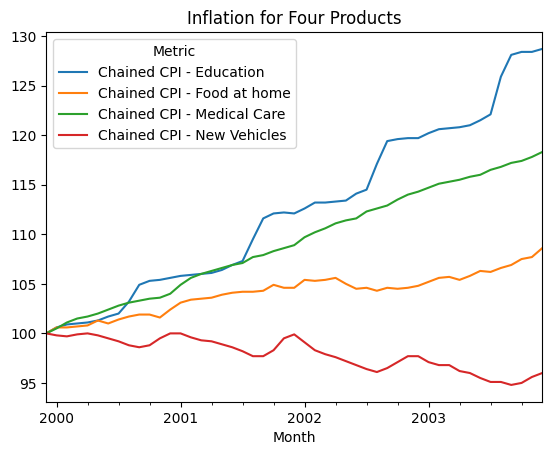

In [11]:
dfw.plot.line(title = 'Inflation for Four Products');